# Paired Sample T-test

- The paired sample t-test is also known as the `dependent sample t-test`, and `paired t-test`. Furthermore, this type of t-test compares two averages (means) and will give you information if the difference between these two averages are zero. In a paired sample t-test, each participant is measured twice, which results in pairs of observations (the next section will give you an example).

## Example on When to Use this Test

- For example, if clinical psychologists want to test whether a  treatment for depression will change the quality of life, they might set up an experiment. In this experiment, they will collect information about the participants’ quality of life before the intervention (i.e., the treatment and after. They are conducting a pre- and post-test study.  In the pre-test the average quality of life might be 3, while in the post-test the average quality of life might be  5. Numerically, we could think that the treatment is working. However, it could be due to a fluke and, in order to test this, the clinical researchers can use the paired sample t-test. 

## Hypotheses

- Now, when performing dependent sample t-tests you typically have the following two hypotheses:

    - Null hypotheses: the true mean difference is equal to zero (between the observations)
    - Alternative hypotheses: the true mean difference is not equal to zero (two-tailed)


## Assumptions

- Are the two samples independent?
- Does the data, i.e., the differences for the matched-pairs, follow a normal distribution?
- Are the participants randomly selected from the population?

In [1]:
# %%writefile stat.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
from scipy.stats import boxcox
from scipy.stats import ttest_rel
import pingouin as pt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_csv('paired_samples_data.csv',
                index_col=0)

df.head()

,ids,test,score
1,1,Pre,29.80
2,2,Pre,42.58
3,3,Pre,45.05
4,4,Pre,35.27
5,5,Pre,28.59


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ids     100 non-null    int64  
 1   test    100 non-null    object 
 2   score   100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df['test'].value_counts()

Pre     50
Post    50
Name: test, dtype: int64

In [5]:
b = df.query('test == "Pre"')['score']
a = df.query('test == "Post"')['score']

### Subset data

In [6]:
from scipy.stats import ttest_rel

ttest_rel(a, b)

Ttest_relResult(statistic=115.4384000507416, pvalue=2.3495186777870983e-61)

## Paired Sample T-test in Python with Pingouin

In [7]:
import pingouin as pt


pt.ttest(a, b, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,115.44,49,two-sided,0.00,"[5.86, 6.07]",0.88,2.437e+57,1.00


In [8]:
a.mean() - b.mean()

5.962400496008584

In [9]:
b.mean()
b.std()

a.mean()
a.std()

39.77510869313241

6.758953748998176

45.737509189140994

6.771274874942872

**The results from the pre-test (Mean = 39.77, SD = 6.758)  and post-test (M = 45.737, SD = 6.77) quality of life test suggest that the treatment resulted in an improvement in quality of life, t(49) = 115.4384, p < .01.**

## Visualize the Data

<AxesSubplot:xlabel='test', ylabel='score'>

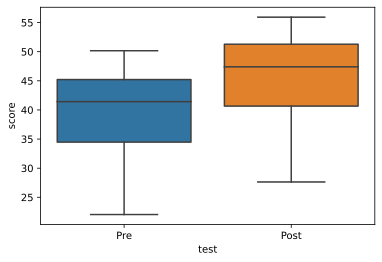

In [10]:
sns.boxplot(x='test', y='score', data=df)

<AxesSubplot:xlabel='test', ylabel='score'>

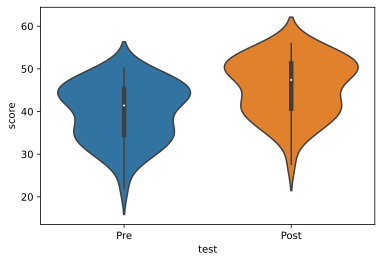

In [11]:
sns.violinplot(x='test', y='score', data=df)